In [50]:
import sympy as sp
from sympy.abc import x, y, z

sp.init_printing()

import matplotlib.pyplot as plt
import sys
sys.path.append('../')

# plt.style.use('')

In [51]:
from sympy.abc import a, b
f1, f2 = sp.symbols("p_0 p_1")
a,  b  = sp.symbols(r"\Gamma_\uparrow \Gamma_\downarrow")
A = sp.Matrix(2, 2, [-a, b, a, -b])

f = sp.Matrix(2, 1, [f1, f2])

In [52]:
P, D  = A.diagonalize()
P, D 

⎛⎡\Gamma_\downarrow    ⎤                                           ⎞
⎜⎢─────────────────  -1⎥  ⎡0                   0                  ⎤⎟
⎜⎢ \Gamma_\uparrow     ⎥, ⎢                                       ⎥⎟
⎜⎢                     ⎥  ⎣0  -\Gamma_\downarrow - \Gamma_\uparrow⎦⎟
⎝⎣        1          1 ⎦                                           ⎠

In [53]:
P * f, P * A * f

⎛                             ⎡                                               
⎜⎡\Gamma_\downarrow⋅p₀     ⎤  ⎢                                               
⎜⎢──────────────────── - p₁⎥  ⎢p₀⋅(-\Gamma_\downarrow - \Gamma_\uparrow) + p₁⋅
⎜⎢  \Gamma_\uparrow        ⎥, ⎢                                               
⎜⎢                         ⎥  ⎢                                               
⎝⎣         p₀ + p₁         ⎦  ⎣                                           0   

⎛                 2                    ⎞⎤⎞
⎜\Gamma_\downarrow                     ⎟⎥⎟
⎜────────────────── + \Gamma_\downarrow⎟⎥⎟
⎝ \Gamma_\uparrow                      ⎠⎥⎟
                                        ⎥⎟
                                        ⎦⎠

In [54]:
f, g = sp.symbols("p_0 p_1", cls = sp.Function)
t    = sp.symbols("t")
# a, b = sp.symbols("a b")



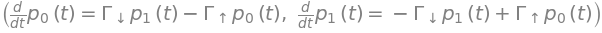

In [55]:
eq1 = sp.Eq(f(t).diff(t), - a * f(t) + b * g(t))
eq2 = sp.Eq(g(t).diff(t),   a * f(t) - b * g(t))

eq1, eq2

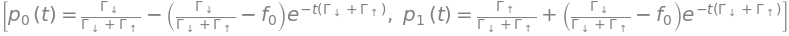

In [56]:
from sympy.solvers.ode.systems import dsolve_system
f0 = sp.symbols("f_0")
g0 = 1 - f0
sols = dsolve_system([eq1, eq2], [f(t), g(t)], ics = {f(0): f0, g(0): g0})
sols[0]

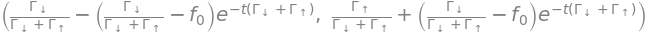

In [57]:
f_sol = sols[0][0].rhs
g_sol = sols[0][1].rhs


subs = {a: 1 / 10, b: 1 / 100, f0: 0.95, g0: 0.05}

f_sol, g_sol

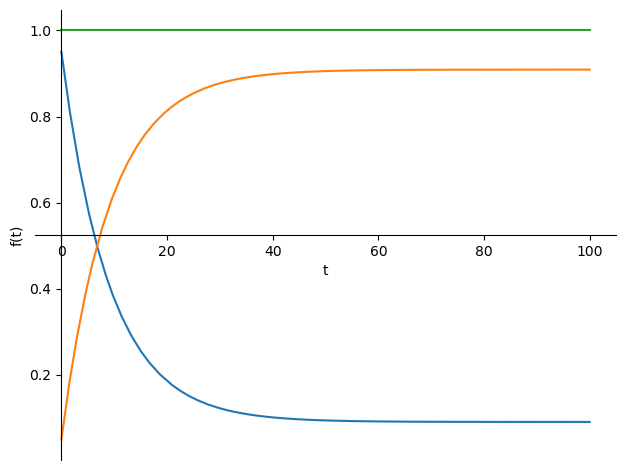

In [58]:
from sympy.plotting import plot
plot(f_sol.subs(subs), g_sol.subs(subs), (f_sol + g_sol).subs(subs), (t, 0, 100), show = True)